# Fashion dataset image classification

##  based on tensorflow tutorial:
https://www.tensorflow.org/tutorials/keras/classification

### Step 1: import libraries and the data

In [78]:
#libraries

#if tensorflow is installed with cuda:
#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


import tensorflow as tf


#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#checking tf 
print(tf.__version__)

2.14.0


In [13]:
#download  the dataset (more on it here: https://github.com/zalandoresearch/fashion-mnist)
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [14]:
#class names are NOT in the dataset, so it make it easier to read, here are the string labels:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Stet 2: exploring the data

In [15]:
#training set: 60k images, 28 x 28 pixels
train_images.shape

(60000, 28, 28)

In [16]:
len(train_labels)

60000

In [17]:
#testing set: 10k images, 28 x 28 pixels
test_images.shape

(10000, 28, 28)

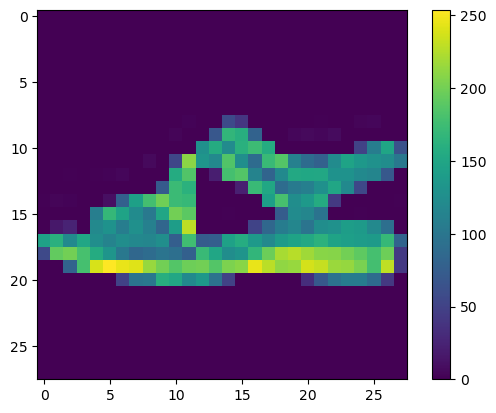

In [18]:
#print an image
plt.figure() #make me a figure
plt.imshow(train_images[43]) # what image
plt.colorbar() #put a color bar
plt.grid(False) # well, grid
plt.show()

### Step 3: data preprocessing

In [19]:
# to train the model, we should encode 0 - 250 pixels into 0 - 1

train_images = train_images / 255.0
test_images = test_images / 255.0


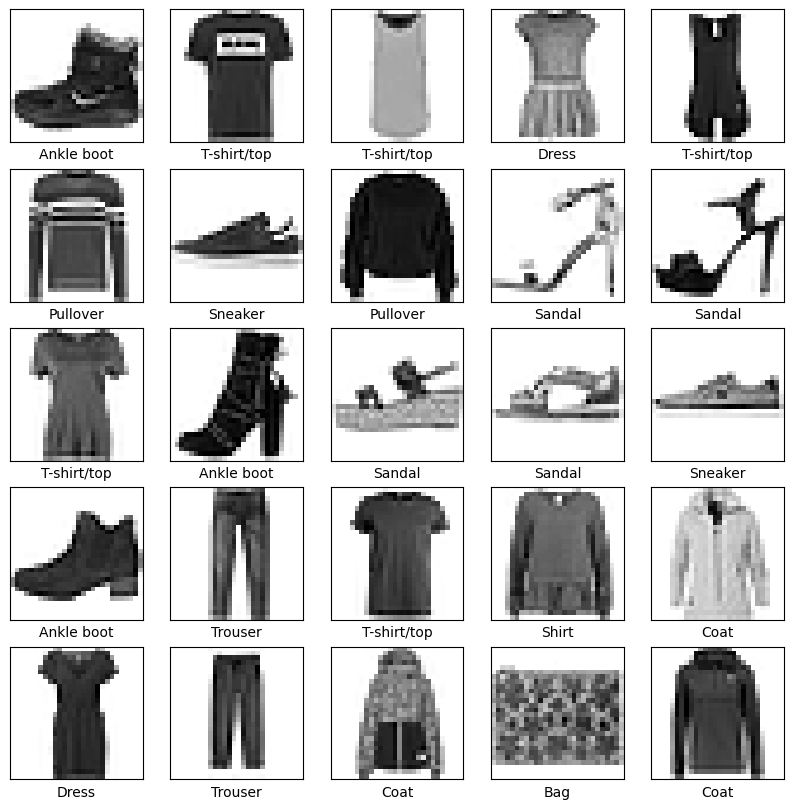

In [20]:
# Verify and display the first X images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Step 4: building the model

In [22]:
#Building the model:

#1 Basic building block = layer


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #two-dimensions ->> one dimension
    tf.keras.layers.Dense(128, activation="relu"), #neural layers with 128 neurons
    tf.keras.layers.Dense(10) #128 neurons ->> 10 classes
])

In [24]:
# 2 Compiling the model
model.compile(optimizer="adam", #updated on the data and loss function
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=["accuracy"]) #accuracy as a metrics!

### Step 5: training the model

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.4955 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 1s 647us/step - loss: 0.3739 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 1s 648us/step - loss: 0.3374 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 1s 652us/step - loss: 0.3143 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 1s 648us/step - loss: 0.2980 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.2816 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 1s 653us/step - loss: 0.2694 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 1s 654us/step - loss: 0.2573 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.2488 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 1s 655u

In [27]:
# Evaluate accuracy on the test dataset:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy: ", test_acc)

313/313 - 0s - loss: 0.3287 - accuracy: 0.8860 - 185ms/epoch - 592us/step

Test accuracy:  0.8859999775886536


In [ ]:
#accuracy is less => the model is overfitted

### Step 6: making and analysing predictions

In [29]:
#Make predictions
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()]) #softmax: logits -> probabilities (easier to read)

In [30]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 404us/step


In [41]:
predictions[0] #one picture - the probabilities to get to 10 classes

array([9.8302405e-07, 1.1880138e-08, 2.8774887e-06, 2.7009093e-09,
       7.1350335e-08, 7.2826189e-04, 1.1847582e-05, 8.8081330e-02,
       6.8577341e-05, 9.1110611e-01], dtype=float32)

In [33]:
np.argmax(predictions[0]) #the best option is class 9 (which is labeled as ankle boot)

9

In [42]:
#plotting the image and its probabilities:

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i] #label is true!
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


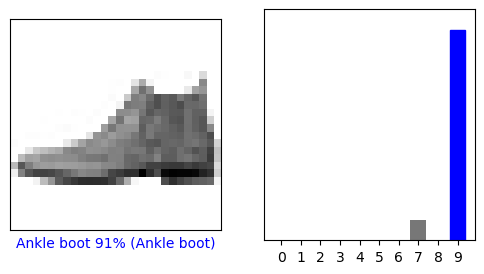

In [43]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


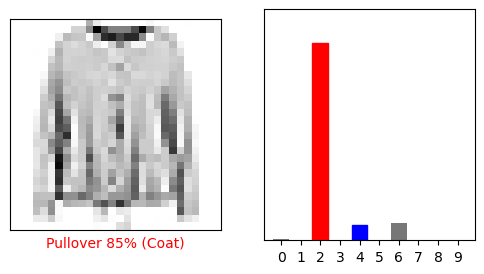

In [49]:
i = 25
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
#I'd think it's a pullover too! A label error?

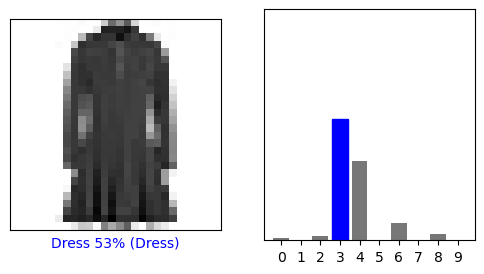

In [51]:
i = 29
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

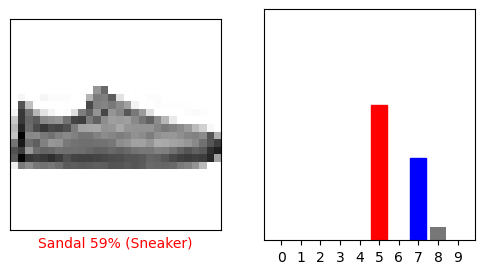

In [52]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


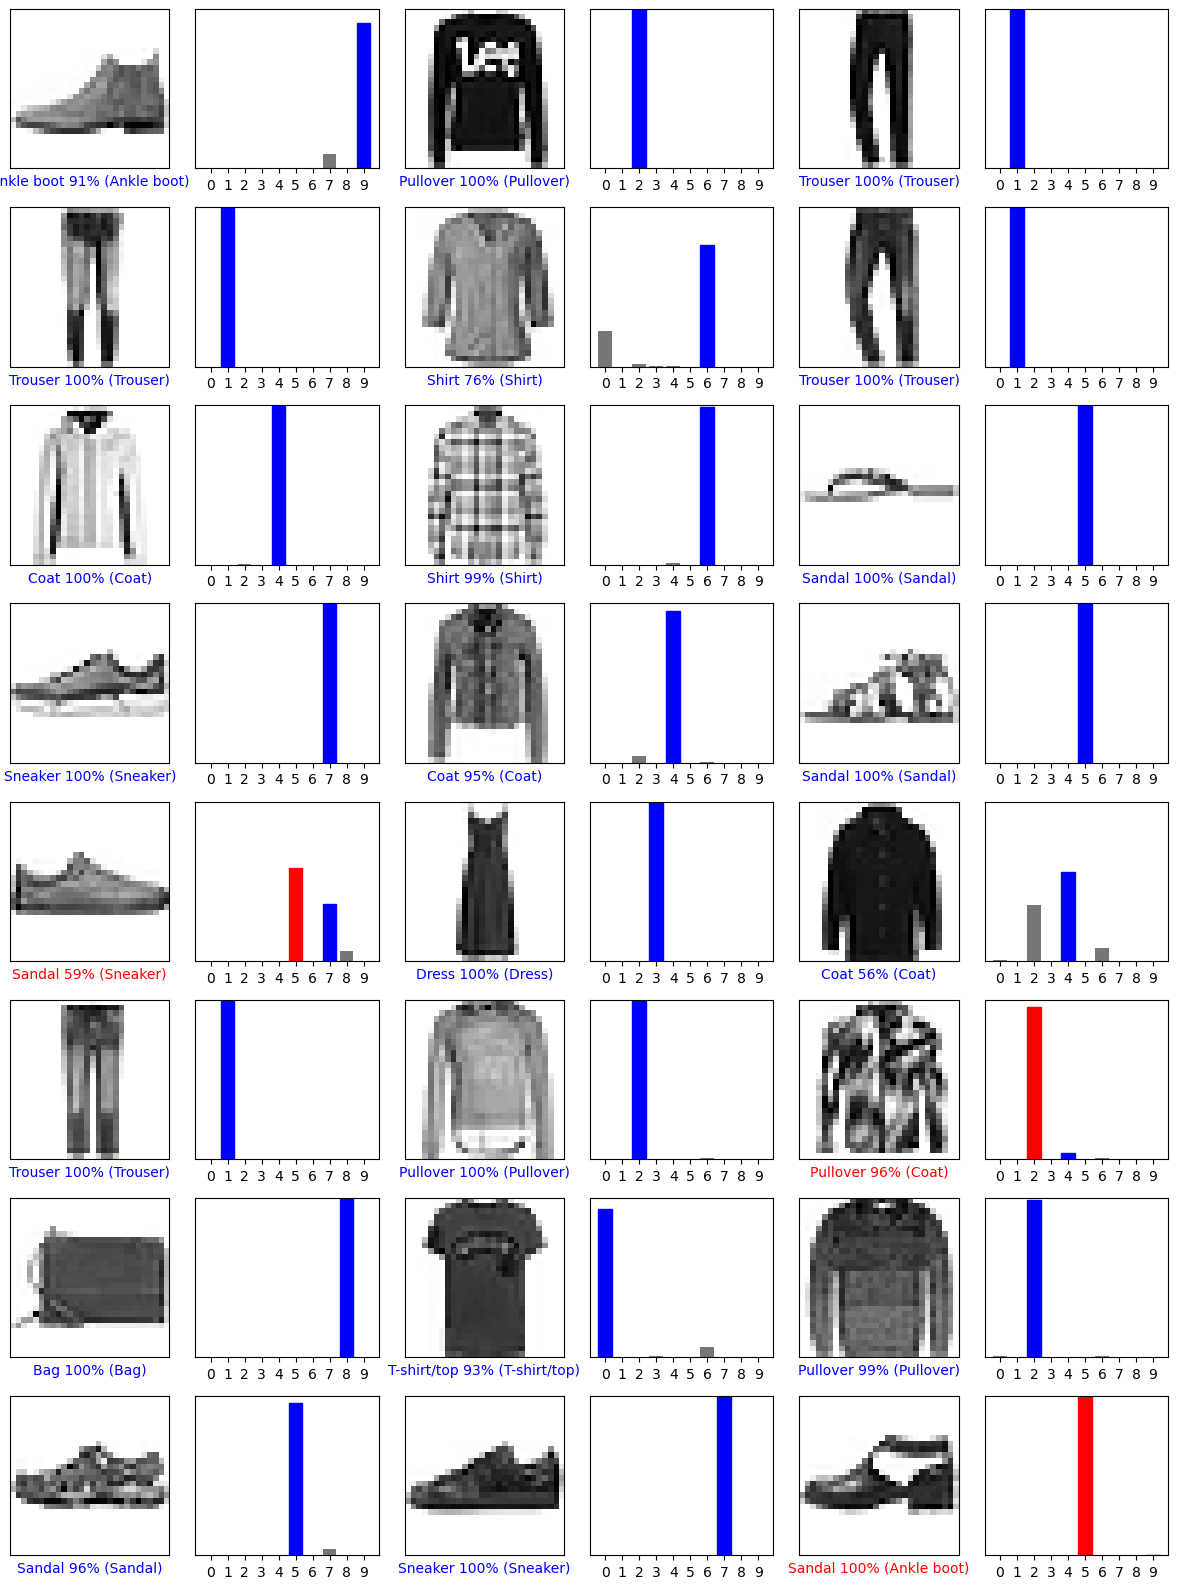

In [54]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


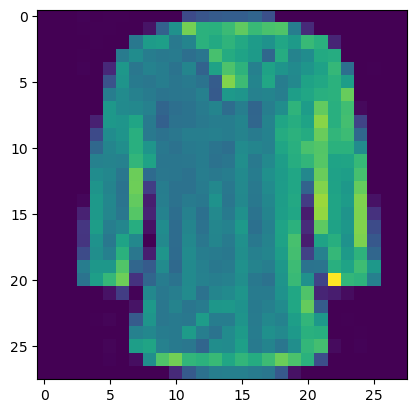

In [74]:
#A prediction for a single image:

#What image
img = test_images[4]
plt.figure() #make me a figure
plt.imshow(img) #what image
plt.grid(False) 
plt.show()


In [75]:
#Creating a batch (even though it's one pic)
img = (np.expand_dims(img,0))

In [76]:
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 13ms/step
[[2.2177772e-01 4.2686356e-08 1.4343272e-02 5.6624069e-04 3.4794339e-03
  1.4348043e-07 7.5983220e-01 9.9637143e-09 8.9198744e-07 9.7391819e-09]]


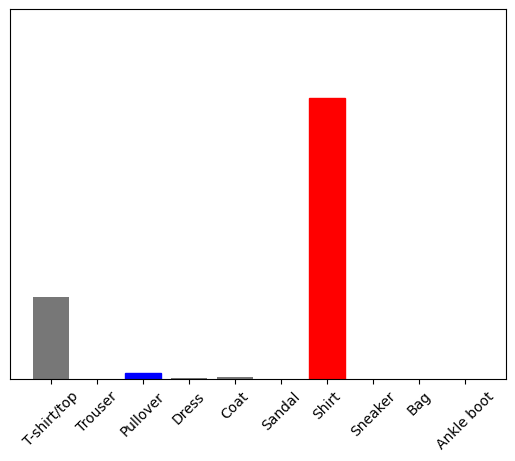

In [77]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
